# German Credit Analysis workbook

### Table of Contents
- [Model Functions](#Model-functions)

In [2]:
# whole standard Data Science library
import pandas as pd
import numpy as np


# setting random seed to 7
np.random.seed(7)

#vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Sklearn modules including classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier
from sklearn.ensemble import HistGradientBoostingClassifier # Sklearn version of LGBM Classifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier

# additional, advanced classifiers
import xgboost as xgb  # XG Boost Classifier
#from lightgbm import LGBMClassifier # Light Gradient Boost Classifier
#from catboost import CatBoostClassifier # Cat boost classifier


# Sklearn testing, evaluating, and managing model
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, f_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# import modules from standard library
from time import time
from pprint import pprint # pretty print
from importlib import reload
import os
#import project modules
import src.german_credit_acquire as gca
import src.german_modelling as gm

import os


# libraries for convenience
pd.options.display.float_format = '{:,.3f}'.format

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [3]:
train, validate, test = gca.get_german_credit()

In [12]:
df = gca.acquire_german_credit()

In [13]:
df

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [450]:
df['Duration'].min()

4

<AxesSubplot:xlabel='checking account', ylabel='Count'>

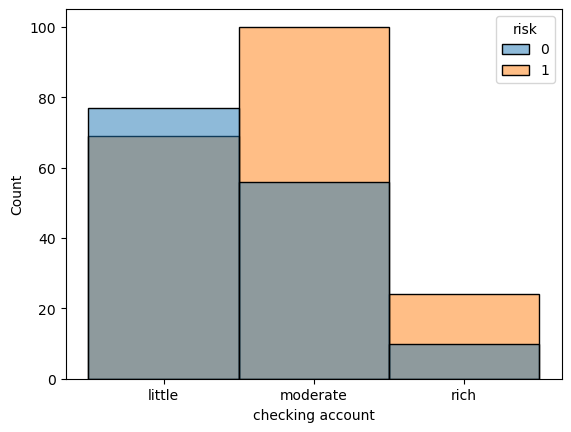

In [54]:
sns.histplot(data = train, x = 'checking account', hue = 'risk')

In [467]:
def job_credit_relationship(df):
    sns.barplot(data = df, y = 'credit amount', x = 'job', palette="tab20_r", hue = 'risk')
    plt.text(-0., 8_000, 'Red was considered low risk', fontsize = 16)
    plt.title('Job relation with credit amount extended', fontsize = 22)
    plt.show()

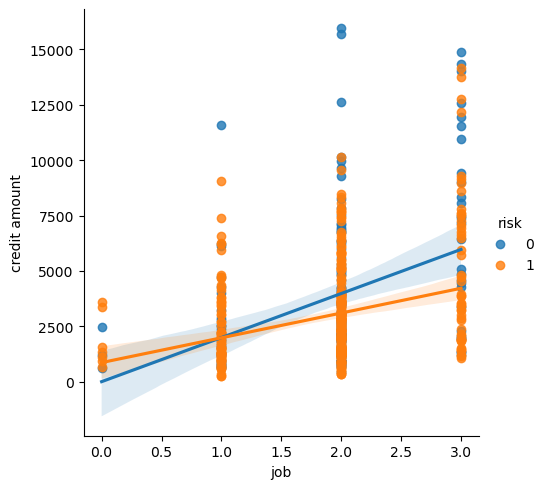

In [72]:
sns.lmplot(data = train, y = 'credit amount', x = 'job', hue = 'risk')

In [68]:
train = gca.bin_age(train)

In [70]:
train.head()

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk,age_groups
175,53,female,3,own,NaN,NaN,7485,30,car,0,older
781,60,male,2,own,rich,NaN,1940,24,car,1,older
827,36,male,2,own,little,NaN,4165,18,business,0,established
449,61,male,2,own,rich,moderate,1512,15,repairs,0,older
367,22,female,2,rent,little,little,3650,18,furniture/equipment,1,early_life


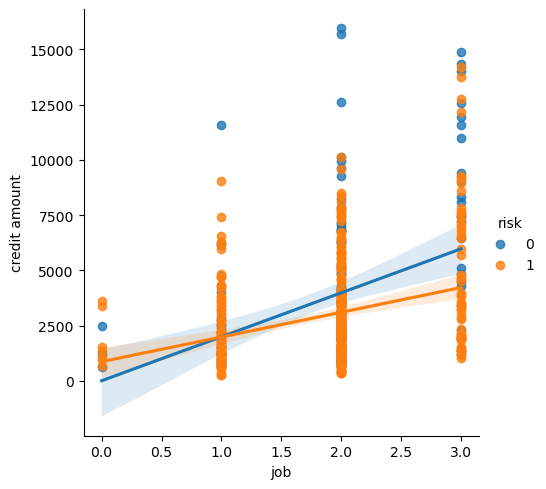

In [69]:
sns.lmplot(data = train, y = 'credit amount', x = 'job', hue = 'risk')

In [19]:
def age_credit_distribution(df):
    plt.figure(figsize=(20,20))
    big_variables= ['age', 'credit amount']
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account']

    n =310
    for i in big_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde = True, bins= 50, palette='hsv')
    
    plt.show()
    
def small_viz(df):
    plt.figure(figsize=(20,20))
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account', 'duration']
    
    n =320
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde= True, bins = 10, palette='hsv')    
    


In [33]:
def age_distribution(df):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='age',hue='risk', kde=True, bins=25, palette='hsv_r')

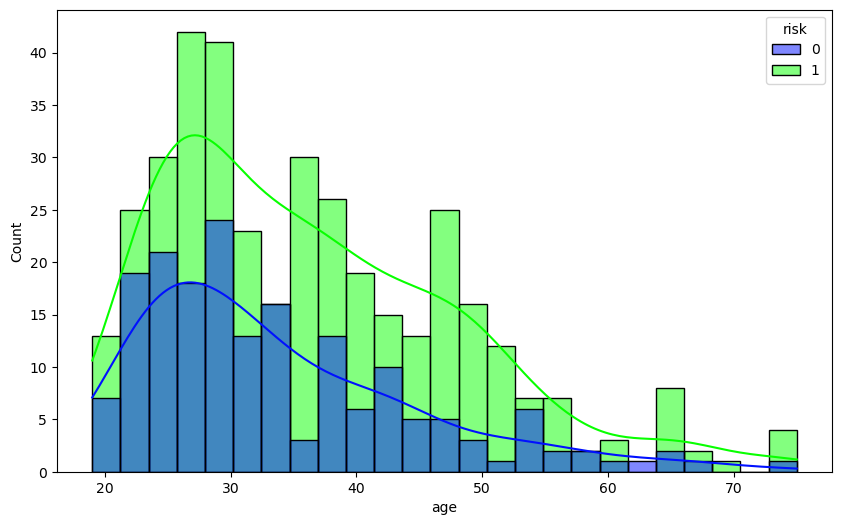

In [34]:
age_distribution(train)

### We see that there is not an even distribution between ages and the effective credit risk the bank sees from applicants.

### I will break these ages into categories for further analysis

#### The minimum and maximum of the age category 
#### Then the quantile proportions of the applicants in the sample: the 25%, 50%, and 80th% quantiles

In [40]:
print((train['age'].min(), train['age'].max()))
print((train['age'].quantile(.25), train['age'].quantile(.5),round(train['age'].quantile(.8),0)))

(19, 75)
(26.0, 33.0, 45.0)


In [25]:
#creating bins for ages

age_groups = (19,26,33,45,75)
age_categories = ['early_life','early_established','established','older']

train['age_groups'] = pd.cut(train['age'],age_groups, labels=age_categories)

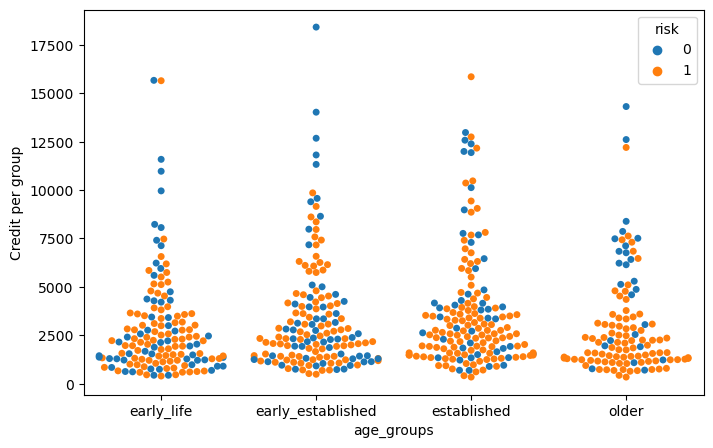

In [28]:
'''
plt.figure(figsize=(8, 4))
plt.title('Beds / bath ratio ')
ax = sns.swarmplot(x=sample.bed_bath_ratio, y=target)
plt.ylabel('Absolute value of the logerror')
plt.ylim(0, 0.55)
ax.set(xticks=[0.33, 5, 9, 13, 18])
ax.set(xticklabels=[0.33, 1.25, 2.5, 3.75, 5.00])
plt.show()
'''
plt.figure(figsize=(8,5))
ax = sns.swarmplot(x=train['age_groups'], y = train['credit amount'], hue = train['risk'])
plt.ylabel('Credit per group')
plt.show()

### We see that the age categories appear to consolidate more and more 'good credit' as the loan applicant gets more established

<AxesSubplot:xlabel='risk', ylabel='Count'>

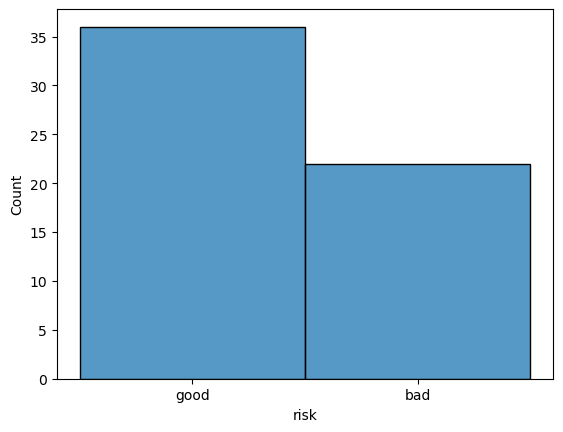

In [54]:
sns.histplot(data =train[train.housing == 'free'], x = 'risk')

In [7]:
train[train['checking account'] == 'nan']

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [121]:
train['checking account'] = train['checking account'].replace({np.NAN:'none'})

In [77]:
nan_bool = train['checking account'] == 'nan'

In [92]:
test_df

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
175,53,female,3,own,none,none,7485,30,car,0
781,60,male,2,own,rich,none,1940,24,car,1
827,36,male,2,own,little,none,4165,18,business,0
449,61,male,2,own,rich,moderate,1512,15,repairs,0
367,22,female,2,rent,little,little,3650,18,furniture/equipment,1
...,...,...,...,...,...,...,...,...,...,...
169,31,male,2,own,little,moderate,1935,24,business,0
445,41,female,1,rent,none,none,1244,9,education,1
817,24,female,2,rent,little,none,1554,6,radio/TV,1
231,51,male,1,free,quite rich,none,2507,9,car,1


In [119]:
train['checking account'].value_counts()

little      153
moderate    151
rich         36
Name: checking account, dtype: int64

In [86]:
little_bool = train['checking account'] == 'little'

In [6]:
train[train['checking account'] == 'little'].sum()

/var/folders/hf/46l4fb0x1bj47kh2tdxlqp1h0000gn/T/ipykernel_1444/2923263472.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['checking account'] == 'little'].sum()


age                5652
job                 294
credit amount    506593
duration           3307
dtype: int64

In [97]:
train[little_bool]

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [82]:
df['checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

<AxesSubplot:xlabel='risk', ylabel='Count'>

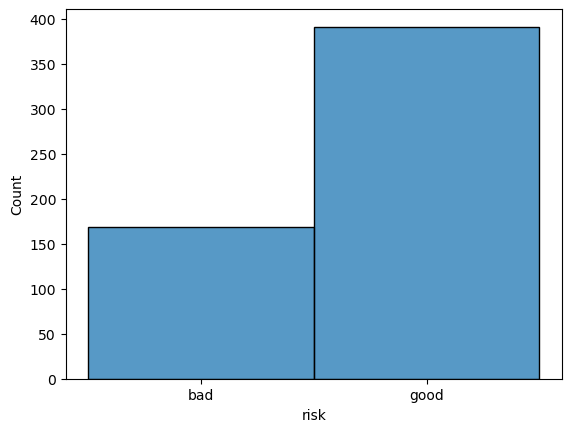

In [81]:
sns.histplot(data =train[train['checking account'] =='nan'], x = 'risk')

<AxesSubplot:xlabel='checking account', ylabel='Count'>

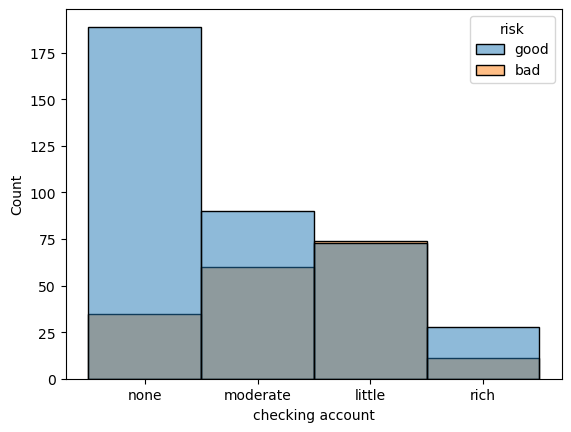

In [14]:
sns.histplot(data = train, x = 'checking account', hue = 'risk')

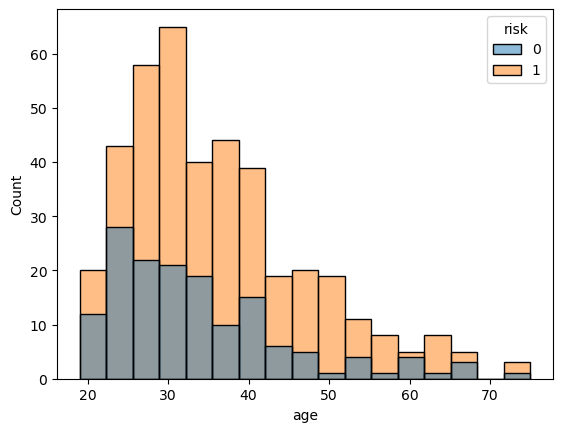

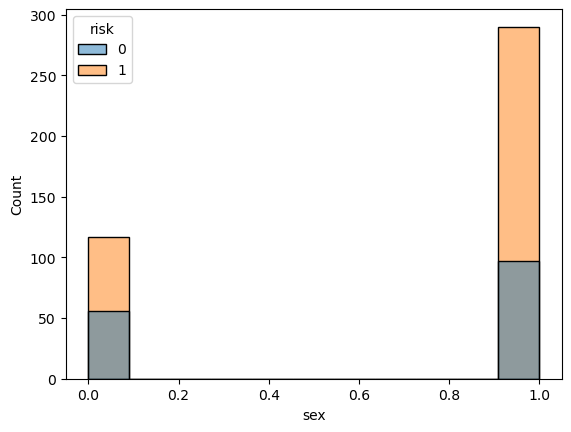

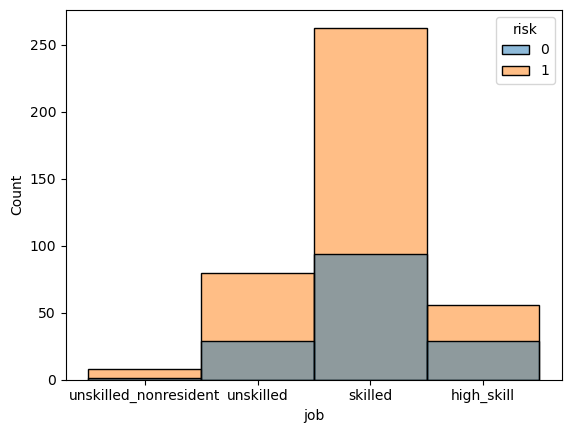

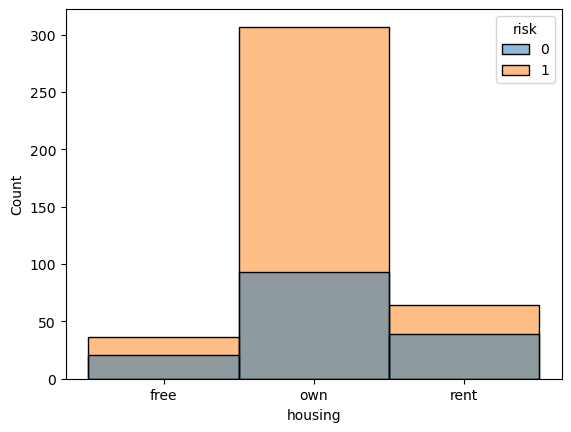

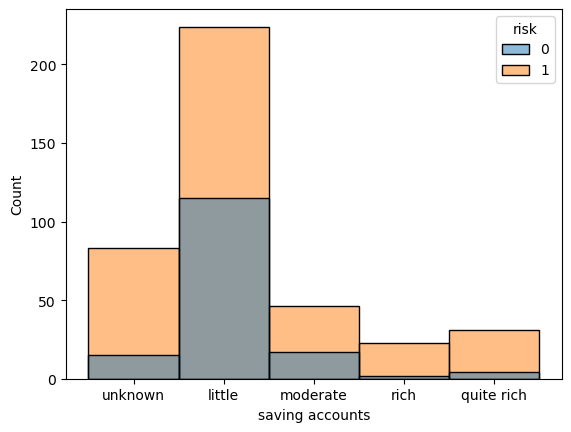

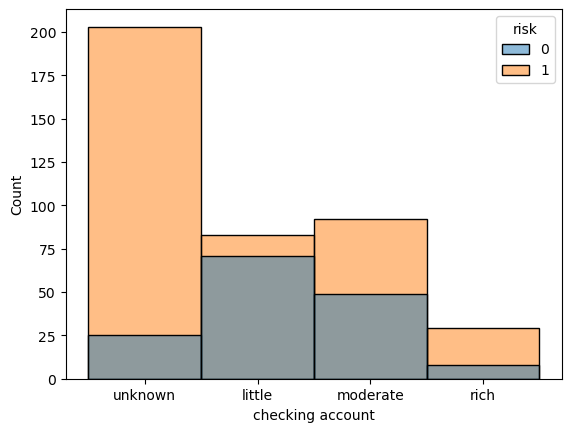

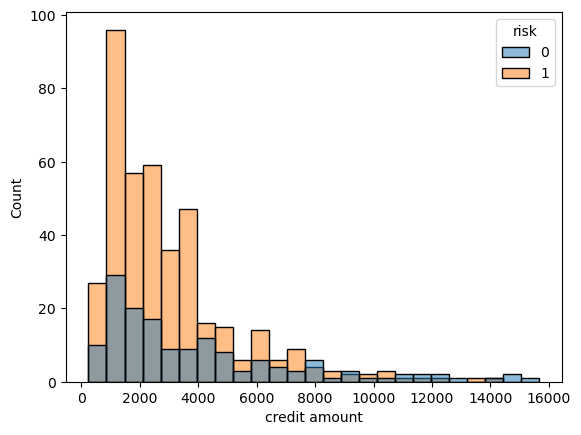

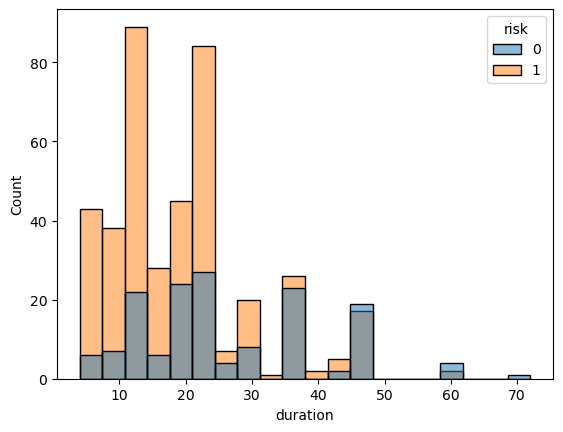

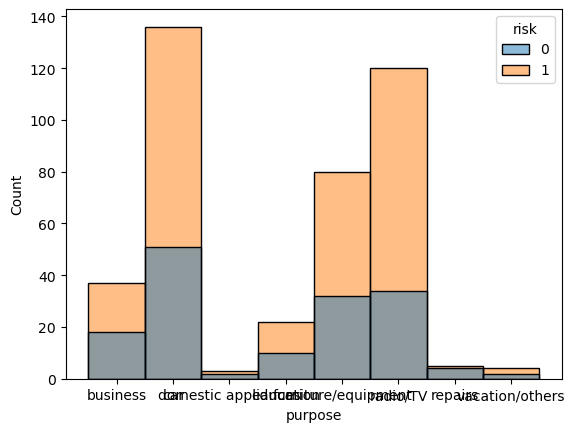

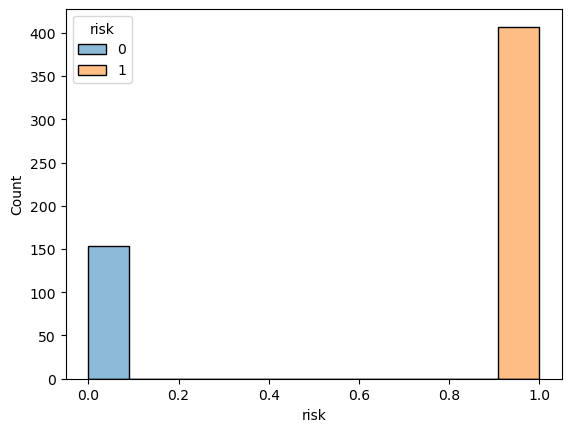

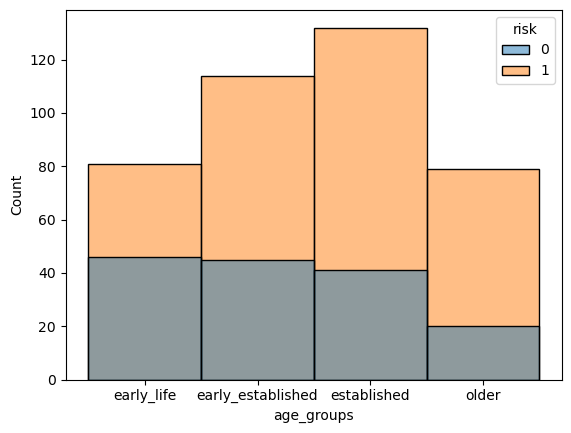

In [115]:
for col in train.columns:
    #n = 441
    sns.histplot(data = train, x = col, hue = 'risk')
    #plt.subplot(n)
    #n +=1
    plt.show()

# Baseline

In [274]:
train, validate, test = gca.get_german_credit()

In [275]:
ge.baseline(train, 'risk')

0.6785714285714286

# KNN 
- determining how many neighbors makes for the best model

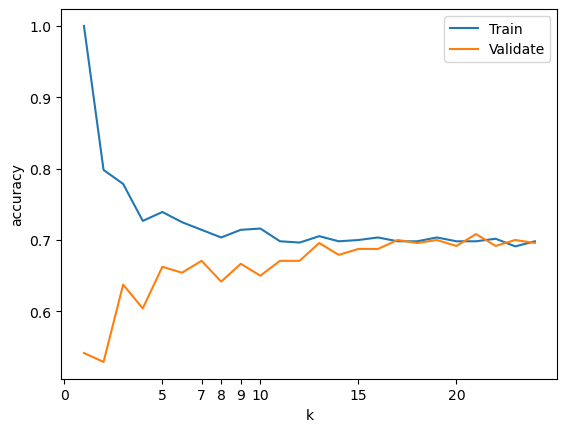

In [405]:
# model after dividing age into groups and 
gm.find_best_knn(x_train, x_validate, y_train, y_validate)

In [439]:
df = gm.find_best_knn(x_train, x_validate, y_train, y_validate, df= True)
df.sort_values(by='validate',  ascending = False)

,train,validate
20,0.698,0.708
16,0.698,0.700
22,0.691,0.700
18,0.704,0.700
12,0.705,0.696
17,0.698,0.696
23,0.698,0.696
19,0.698,0.692
21,0.702,0.692
15,0.704,0.688


<div class = 'alert alert-block alert-info'>
    
# Model functions
    
[Back to top](#Table-of-Contents)

In [14]:
########################################################
############         Model Collection      #############
  ######  Models used with hyperparameter tuning  ######
########################################################

########################################################################
           ############       Random Forest       ##############     
  ######  Creates N number of trees using random starting values  ######
########################################################################

def random_forest_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):
    
    rf_classifier = RandomForestClassifier(
        min_samples_leaf=10,
        n_estimators=200,
        max_depth=5, 
        bootstrap=True,
        oob_score=True,
        n_jobs=-1,
        max_features='auto'
    )

    rf_classifier.fit(x_train, y_train)
    
    if validate == True:
        y_preds = rf_classifier.predict(x_validate)
        return y_preds
    
    if test == True:
        y_preds = rf_classifier.predict(x_test)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = rf_classifier.predict(x_train)
        return y_preds


###################################################################
    ############       K Nearest Neighbors       ##############     
######  Finds Groupings of observations and classifies them  ######
###################################################################   
    
    
def knn_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False, k=5):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
       
    if validate == True:  
        y_preds = knn.predict(x_validate)
        return y_preds
    
    if test == True:  
        y_preds = knn.predict(x_test)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = knn.predict(x_train)
        return y_preds
    
############################################################################
    ############       Gradient Boosting Classifier       ##############     
######  Creates a random forest where each tree learns from the last  ######
############################################################################

def gradient_booster_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):

    gradient_booster = GradientBoostingClassifier(
                            learning_rate=0.03,
                            max_depth = 5,
                            n_estimators=500)
    
    gradient_booster.fit(x_train, y_train)
    
    if validate == True:
        y_preds = gradient_booster.predict(x_validate)
        return y_preds

    if test == True:
        y_preds = gradient_booster.predict(x_test)
        return y_preds

    if (test == False and test == False):
        y_preds = gradient_booster.predict(x_train)
        return y_preds
    
'''
#################################################################
#########         LightGMB Boosting Classifier       ###########     
#######       Uses Light Gradient Boosting Algorthm       #######
#################################################################

def lgmboost_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, test = False):
    
    lgmboost = LGBMClassifier(
                learning_rate=0.03,
                max_depth = 5,
                n_estimators=500)

    lgmboost.fit(x_train, y_train)
    
    if test == False:
        y_preds = lgmboost.predict(x_train)
        return y_preds

    if test == True:
        y_preds = lgmboost.predict(x_test)
        return y_preds
'''
    
#################################################################
#########       HistGradientBoosting Classifier      ###########     
#######    Inspired by Light Gradient Boosting Algorthm    ######
#################################################################

def histgradientboost_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):
    
    HGboost = HistGradientBoostingClassifier(
                                            learning_rate = 0.03,
                                            max_depth     = 5)
   
    HGboost.fit(x_train, y_train)
           
    if test == True:
        y_preds = HGboost.predict(x_test)
        return y_preds
    
    if validate == True:
        y_preds = HGboost.predict(x_validate)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = HGboost.predict(x_train)
        return y_preds

##########################################################
#########          Cat Boost Classifier        ###########     
#######      Cat Boost Gradient Boosting Algorthm       ##
##########################################################

def catboost_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):
    
    catboost_params = {'loss_function' : 'Logloss',
                        'eval_metric' : 'AUC',
                        'verbose' : 200}
                      
    catboost = CatBoostClassifier(params = catboost_params)

    catboost.fit(x_train, y_train, use_best_model = True)#, plot = True)
    
    if test == True:
        y_preds = catboost.predict(x_test)
        return y_preds
    
    if validate == True:
        y_preds = catboost.predict(x_validate)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = catboost.predict(x_train)        
        return y_preds   
    
####################################################################
#########         Multinomial Naive Bayes Classifier     ###########     
#######     Uses Naive Bayes as Classification Algorithm     #######
####################################################################

def nb_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):
    
    naive_bayes = MultinomialNB()
    naive_bayes.fit(x_train, y_train)
    
    if test == True:
        y_preds = naive_bayes.predict(x_test)
        return y_preds
    
    if validate == True:
        y_preds = naive_bayes.predict(x_validate)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = naive_bayes.predict(x_train)        
        return y_preds 
    
#################################################################
############         XG Boosting Classifier       ##############     
    #######       Uses XG Boosting Algorthm       #######
#################################################################

def xgboost_model(x_train, y_train, x_validate=0, y_validate=0, x_test=0, y_test=0, validate = False, test = False):

    xgb_params = {'max_depth'       : 3,
                  'eta'             : 0.1,   # learning rate
                  'silent'          : 0,
                  #'eval_metric'     : 'auc',
                  'subsample'       : 0.8,
                  'colsample_bytree': 0.8,
                  #'objective'       : 'binary:logistic',
                  'objective'       : 'multi:softprob'}
    '''
    xgboost_regular_model = xgb.XGBRegressor(n_estimators = 1000, 
                         early_stopping_rounds = 50,
                         learning_rate=0.01)
    xgboost_regular_model.fit(x_train, y_train,
             eval_set = [(x_train, y_train), (x_validate, y_validate)],
             verbose = 10)
    '''
    
    xgboost_model = xgb.XGBClassifier(tree_method       = 'hist',
                                      num_class         = 3,
                                      max_depth         = 5,
                                      eta               = 0.01,   # learning rate
                                      n_estimators      = 1000,
                                      eval_metric       = 'merror',
                                      subsample         = 0.8,
                                      colsample_bytree  = 0.8,
                                      #objective         = 'binary:logistic'
                                      objective         = 'multi:softprob')
                                      #maximize          = True
                
    
    
    xgboost_model.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_validate, y_validate)], early_stopping_rounds=25)
    
    if test == True:
        y_preds = xgboost_model.predict(x_test)
        return y_preds
    
    if validate == True:
        y_preds = xgboost_model.predict(x_validate)
        return y_preds
    
    if (test == False and validate == False):
        y_preds = xgboost_model.predict(x_train)        
        return y_preds 

In [15]:
def evaluate_classification_model(model_name, y_true, y_predictions, df=False, full= False):
    TN, FP, FN, TP = confusion_matrix(y_true, y_predictions).ravel()
    ALL = TP + TN + FP + FN

    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    if df == False:
        return accuracy

    f1_score = 2*(precision*recall)/(precision+recall)
    
    if full == True:
        performance_df = pd.DataFrame(
                                         {'model' : [model_name],
                                          'accuracy' : [accuracy],
                                          'f1_score' : [f1_score],
                                          'precision' : [precision], 
                                          'recall' : [recall],
                                          'true_positive_rate' : [true_positive_rate],
                                          'false_positive_rate': [false_positive_rate], 
                                          'true_negative_rate' : [true_negative_rate], 
                                          'false_negative_rate': [false_negative_rate]
                                          })
        return performance_df

    
    
    if full == False:
        performance_df = pd.DataFrame(
                                         {'model' : [model_name],
                                          'accuracy' : [accuracy],
                                          'f1_score' : [f1_score],
                                          'precision' : [precision], 
                                          'recall' : [recall]
                                         })

    if df == True:
        return performance_df
    

In [20]:
hist_y_preds_train = histgradientboost_model(x_train, y_train)
xgb_y_preds_train = xgboost_model(x_train, y_train, x_validate, y_validate)

[0]	validation_0-merror:0.20179	validation_1-merror:0.29167
[1]	validation_0-merror:0.18214	validation_1-merror:0.31250
[2]	validation_0-merror:0.17500	validation_1-merror:0.30000
[3]	validation_0-merror:0.16607	validation_1-merror:0.30833
[4]	validation_0-merror:0.17321	validation_1-merror:0.30833
[5]	validation_0-merror:0.17143	validation_1-merror:0.29583
[6]	validation_0-merror:0.17321	validation_1-merror:0.29167
[7]	validation_0-merror:0.17500	validation_1-merror:0.28750
[8]	validation_0-merror:0.17143	validation_1-merror:0.27500
[9]	validation_0-merror:0.17500	validation_1-merror:0.27500
[10]	validation_0-merror:0.16786	validation_1-merror:0.27917
[11]	validation_0-merror:0.16429	validation_1-merror:0.28333
[12]	validation_0-merror:0.16964	validation_1-merror:0.27500
[13]	validation_0-merror:0.15893	validation_1-merror:0.27500
[14]	validation_0-merror:0.15893	validation_1-merror:0.27500
[15]	validation_0-merror:0.16429	validation_1-merror:0.27083
[16]	validation_0-merror:0.17143	v

In [21]:
hist_y_preds_train

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [19]:
xgb_y_preds_train

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
def get_models(x_train, y_train, x_validate, y_validate):

    
    #######       sklearn models       #######
    knn_y_preds_train= knn_model(x_train, y_train, k=11)
    knn_y_preds_val = knn_model(x_train, y_train, x_validate, validate = True)

    nb_y_preds_train = nb_model(x_train, y_train)
    nb_y_preds_val = nb_model(x_train, y_train, x_validate, validate = True)

    
    #######       sklearn ensemble modeling       #######
    rf_y_preds_train = random_forest_model(x_train, y_train)
    rf_y_preds_val = random_forest_model(x_train, y_train, x_validate, validate = True)
    
    gb_y_preds_train= gradient_booster_model(x_train, y_train)
    gb_y_preds_val = gradient_booster_model(x_train, y_train, x_validate, validate = True)
    
    hist_y_preds_train = histgradientboost_model(x_train, y_train)
    hist_y_preds_val = histgradientboost_model(x_train, y_train, x_validate, validate = True)
    
    #######       Advanced Proprietary Ensemble Models       #######
    
    #lgm_y_preds_train = lgmboost_model(x_train, y_train)
    #lgm_y_preds_val = lgmboost_model(x_train, y_train, x_validate, test = True)

    #xgb_y_preds_train = xgboost_model(x_train, y_train, x_validate, y_validate)
    #xgb_y_preds_val = xgboost_model(x_train, y_train, x_validate, y_validate, validate = True)
    
    #cat_y_preds_train = catboost_model(x_train, y_train)
    #cat_y_preds_val = catboost_model(x_train, y_train, x_validate, test = True)
    

    
    performance_df = evaluate_classification_model('knn train', y_train, knn_y_preds_train, df=True)
    performance_df = performance_df.append(evaluate_classification_model('knn_validate', y_validate, knn_y_preds_val, df=True))
    performance_df = performance_df.append(evaluate_classification_model('naive bayes train', y_train, nb_y_preds_train, df=True))
    performance_df = performance_df.append(evaluate_classification_model('naive bayes validate', y_validate, nb_y_preds_val, df=True))
    performance_df = performance_df.append(evaluate_classification_model('random_forest train', y_train, rf_y_preds_train, df=True))
    performance_df = performance_df.append(evaluate_classification_model('random_forest validate', y_validate, rf_y_preds_val, df=True))
    performance_df = performance_df.append(evaluate_classification_model('gradient boost train', y_train, gb_y_preds_train, df=True))
    performance_df = performance_df.append(evaluate_classification_model('gradient boost validate', y_validate, gb_y_preds_val, df=True))
    performance_df = performance_df.append(evaluate_classification_model('histgradient boost train', y_train, hist_y_preds_train, df=True))
    performance_df = performance_df.append(evaluate_classification_model('histgradient boost validate', y_validate, hist_y_preds_val, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('light gmboost train', y_train, lgm_y_preds_train, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('light gmboost validate', y_validate, lgm_y_preds_val, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('XG Boost train', y_train, xgb_y_preds_train, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('XG Boost validate', y_validate, xgb_y_preds_val, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('Catboost train', y_train, cat_y_preds, df=True))
    #performance_df = performance_df.append(evaluate_classification_model('Catboost validate', y_validate, cat_y_preds_val, df=True))
    

    
    return performance_df

In [26]:
%%time 
x_train, y_train, x_validate, y_validate, x_test, y_test = gca.german_credit_x_y('risk')
performance_df = get_models(x_train, y_train, x_validate, y_validate)
performance_df.sort_values(by ='accuracy', ascending = False)

CPU times: user 6.19 s, sys: 373 ms, total: 6.56 s
Wall time: 2.44 s


,model,accuracy,f1_score,precision,recall
0,gradient boost train,1.000,1.000,1.000,1.000
0,histgradient boost train,0.811,0.876,0.817,0.945
0,random_forest train,0.750,0.849,0.744,0.987
0,knn train,0.743,0.841,0.750,0.957
0,histgradient boost validate,0.733,0.826,0.756,0.910
0,random_forest validate,0.708,0.822,0.714,0.970
0,naive bayes train,0.707,0.800,0.777,0.824
0,naive bayes validate,0.704,0.795,0.767,0.826
0,gradient boost validate,0.671,0.776,0.737,0.820
0,knn_validate,0.629,0.761,0.689,0.850


In [27]:
gb_y_preds_test= gradient_booster_model(x_test, y_test)

final_model = performance_df = evaluate_classification_model('gradient_booster_test', y_test, gb_y_preds_test, df=True, full=True)

## Testing cross validation code

In [1]:
%%time
x,y = get_xy()

model = GradientBoostingClassifier(
                            learning_rate=0.1,
                            max_depth = 5,
                            n_estimators=200)


testing_df = pd.DataFrame(columns = ['speed', 'accuracy'])

start = time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 7)
score = cross_val_score(model, x, y, scoring='accuracy', cv = cv, n_jobs=-1)

speed = np.round(time() - start, 3)
accuracy = np.mean(score).round(3)

testing_df.loc[0] = (speed, accuracy)
                          
print(f"SKLearn's Gradient Booster \nMean Accuracy: {testing_df['accuracy']} \nStd: {np.std(score): .3f} \nRun time: {testing_df['speed']}")

NameError: name 'get_xy' is not defined

In [386]:
x_test.shape[0]

200

In [378]:
final_model

,model,accuracy,f1_score,precision,recall,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate
0,gradient_booster_test,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000


In [213]:
x_train, y_train, x_validate, y_validate, x_test, y_test = gca.german_credit_x_y('risk')

In [477]:
loan_group_list = ['short_term_loan', 'medium_term_loan', 'three_year_loan', 'one_year_loan', 'long_term_loan']

['short_term_loan',
 'medium_term_loan',
 'three_year_loan',
 'one_year_loan',
 'long_term_loan']

In [484]:
train[train['loan_duration_groups'] == 'short_term_loan'].loan_duration_groups

688    short_term_loan
150    short_term_loan
931    short_term_loan
389    short_term_loan
151    short_term_loan
            ...       
515    short_term_loan
186    short_term_loan
976    short_term_loan
492    short_term_loan
792    short_term_loan
Name: loan_duration_groups, Length: 95, dtype: category
Categories (5, object): ['short_term_loan' < 'one_year_loan' < 'medium_term_loan' < 'three_year_loan' < 'long_term_loan']

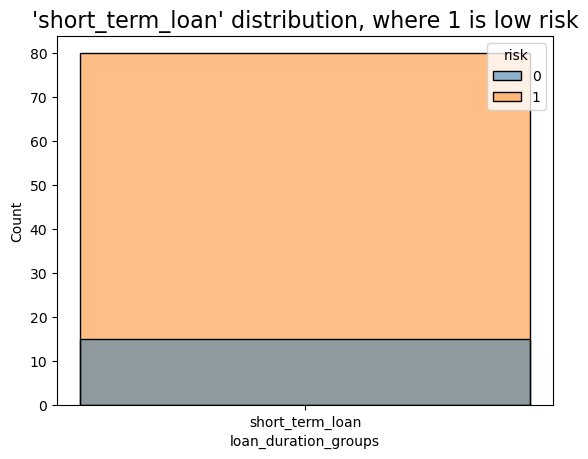

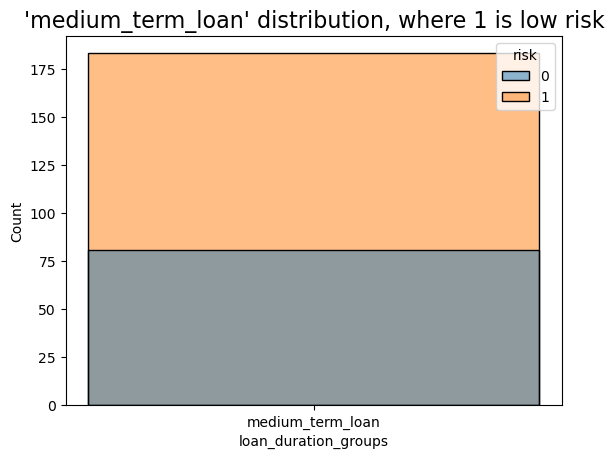

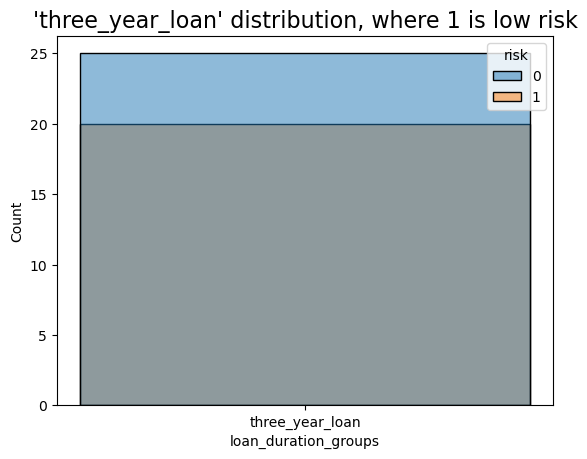

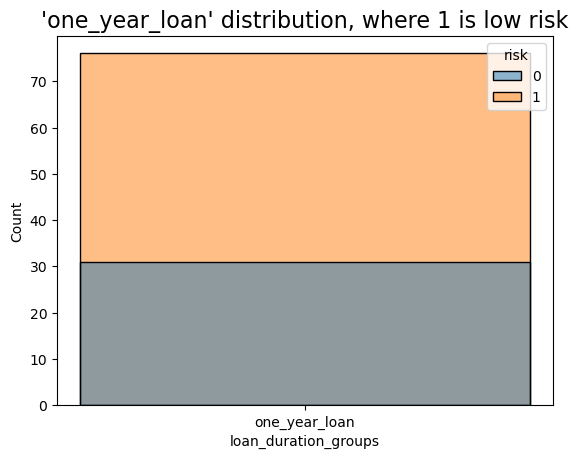

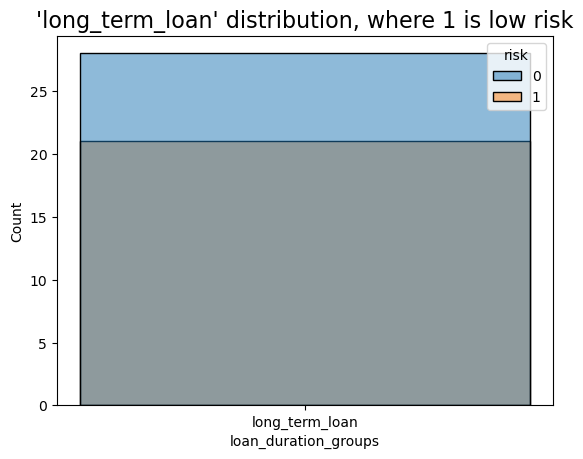

In [485]:

loan_group_list = ['short_term_loan', 'medium_term_loan', 'three_year_loan', 'one_year_loan', 'long_term_loan']
for i in loan_group_list:
        sns.histplot(x= train[train['loan_duration_groups'] == i].loan_duration_groups, hue = train['risk'])
        plt.title(f"'{i}' distribution, where 1 is low risk", fontsize = 16)
        plt.show()